# Importing All libraries

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
import plotly.io as pio
import matplotlib.image as mpimg
import plotly.graph_objects as go


# Reading the file

In [211]:
df=pd.read_csv('/kaggle/input/complete-fifa-2017-player-dataset-global/FullData.csv')


# EDA

In [212]:
#checking for null values
df.isnull().sum()

Name                      0
Nationality               0
National_Position     16513
National_Kit          16513
Club                      0
Club_Position             1
Club_Kit                  1
Club_Joining              1
Contract_Expiry           1
Rating                    0
Height                    0
Weight                    0
Preffered_Foot            0
Birth_Date                0
Age                       0
Preffered_Position        0
Work_Rate                 0
Weak_foot                 0
Skill_Moves               0
Ball_Control              0
Dribbling                 0
Marking                   0
Sliding_Tackle            0
Standing_Tackle           0
Aggression                0
Reactions                 0
Attacking_Position        0
Interceptions             0
Vision                    0
Composure                 0
Crossing                  0
Short_Pass                0
Long_Pass                 0
Acceleration              0
Speed                     0
Stamina             

In [213]:
# Sort by Speed + Strength for physical players
df['Physical_Score'] = df['Speed'] * 0.6 + df['Strength'] * 0.4
df_sorted = df.sort_values('Physical_Score', ascending=False)
df_sorted

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,...,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,Physical_Score
393,Williams,Spain,NaN,NaN,Athletic Bilbao,RW,11.0,08/01/2012,2021.0,80,...,49,53,64,64,10,14,14,15,13,90.6
68,Romelu Lukaku,Belgium,ST,9.0,Everton,ST,10.0,07/30/2014,2019.0,85,...,64,66,80,76,7,8,14,15,10,90.6
1748,Víctor Ibarbo,Colombia,NaN,NaN,Sagan Tosu,RS,32.0,07/01/2011,2018.0,75,...,72,64,70,70,4,4,4,4,4,90.2
2778,Cristiano,Brazil,NaN,NaN,Kashiwa Reysol,LM,9.0,06/26/2016,2022.0,73,...,70,74,69,65,8,13,11,8,8,89.6
7,Gareth Bale,Wales,RS,11.0,Real Madrid,RW,11.0,09/02/2013,2022.0,90,...,86,85,76,76,5,15,11,15,6,89.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3873,Jiří Pavlenka,Czech Republic,Sub,23.0,Free Agents,Res,99.0,01/01/2016,2020.0,73,...,10,14,18,19,75,72,67,73,76,23.0
17282,Darren Jamieson,Scotland,NaN,NaN,Hamilton,Sub,19.0,09/26/2016,2017.0,51,...,10,12,16,7,47,57,56,55,45,22.8
8102,Nelson Ramos,Colombia,NaN,NaN,Indep. Medellín,Sub,1.0,01/05/2017,2022.0,67,...,41,72,46,14,67,58,73,71,65,22.8
10338,Adam Smith,England,NaN,NaN,Northampton,GK,1.0,06/26/2015,2017.0,65,...,18,19,23,12,64,64,64,62,68,22.0


In [214]:
df = df_sorted.drop(['Speed', 'Strength'], axis=1)

In [215]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
import numpy as np

df.fillna(df['National_Kit'].mode()[0], inplace=True)

# Split the features
categorical_features = df.select_dtypes(include=['object']).columns
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# Standard scaling for numerical features
scaler = StandardScaler()
scaled_numerical_data = scaler.fit_transform(df[numerical_features])

# Label encoding for categorical features
label_encoders = {}
encoded_categorical_data = []

for feature in categorical_features:
    le = LabelEncoder()
    
    # Convert to string and handle NaN (e.g., fill with 'missing')
    feature_data = df[feature].astype(str).fillna('missing')
    
    encoded_col = le.fit_transform(feature_data)
    label_encoders[feature] = le
    encoded_categorical_data.append(encoded_col)

# Stack the data
encoded_categorical_data = np.array(encoded_categorical_data).T
processed_data = np.hstack([scaled_numerical_data, encoded_categorical_data])

# Combine into DataFrame
final_columns = numerical_features.tolist() + categorical_features.tolist()
final_df = pd.DataFrame(processed_data, columns=final_columns)

# Ensure all values are floats for downstream ML models
final_df = final_df.astype(float)

final_df.head(15)


,National_Kit,Club_Kit,Contract_Expiry,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,...,National_Position,Club,Club_Position,Club_Joining,Height,Weight,Preffered_Foot,Birth_Date,Preffered_Position,Work_Rate
0,-0.167429,-0.537164,0.145036,1.953152,-0.739370,0.100467,2.274171,1.367876,1.332242,-0.752760,...,0.0,57.0,25.0,1052.0,30.0,33.0,1.0,2846.0,246.0,0.0
1,1.153872,-0.589348,0.014080,2.659087,-0.525699,1.625071,0.933931,1.249071,1.120751,-0.799140,...,26.0,194.0,28.0,1034.0,34.0,50.0,0.0,2295.0,265.0,8.0
2,-0.167429,0.558698,-0.051398,1.247218,0.115315,0.100467,0.933931,1.070863,1.226497,-0.891900,...,0.0,493.0,24.0,848.0,32.0,36.0,1.0,2384.0,255.0,2.0
3,-0.167429,-0.641531,0.210514,0.964844,0.970001,1.625071,0.933931,0.892656,1.173624,-0.567241,...,0.0,325.0,13.0,808.0,27.0,39.0,1.0,197.0,136.0,1.0
4,2.034739,-0.537164,0.210514,3.365021,0.328987,0.100467,2.274171,1.783694,1.808097,0.313976,...,23.0,456.0,25.0,1245.0,27.0,30.0,0.0,3361.0,236.0,2.0
5,-0.167429,-0.224060,0.079558,2.941460,0.328987,1.625071,0.933931,1.427278,1.437988,-0.752760,...,0.0,92.0,28.0,873.0,31.0,36.0,1.0,2893.0,283.0,7.0
6,-0.167429,-0.745899,0.079558,0.964844,0.115315,0.100467,0.933931,0.833253,0.750642,0.963294,...,0.0,404.0,23.0,57.0,26.0,34.0,1.0,1680.0,206.0,8.0
7,-0.167429,-0.015325,0.079558,1.388405,-0.098356,0.100467,-0.406309,0.061020,0.169041,-0.567241,...,0.0,584.0,25.0,169.0,30.0,39.0,1.0,1800.0,287.0,0.0
8,-0.167429,0.819618,0.079558,0.964844,-0.953041,0.100467,2.274171,1.130266,1.437988,-1.123799,...,0.0,365.0,23.0,1231.0,22.0,32.0,1.0,439.0,252.0,1.0
9,4.677340,-0.119692,0.145036,0.541283,-1.380384,0.100467,0.933931,0.655046,0.962133,-0.381721,...,27.0,441.0,29.0,1215.0,32.0,30.0,1.0,1687.0,206.0,1.0


In [216]:
'Speed' in final_df.columns


False

In [217]:
import pandas as pd
from scipy.stats import zscore

# Calculate Z-scores for each column
z_scores = final_df.apply(zscore)

# Define threshold for Z-scores
threshold = 3

# Filter out rows where any column has a Z-score greater than the threshold
final_df = final_df[(z_scores < threshold).all(axis=1)]

final_df.shape

(15250, 52)

In [218]:
#checking for null values
final_df.isnull().sum()


National_Kit          0
Club_Kit              0
Contract_Expiry       0
Rating                0
Age                   0
Weak_foot             0
Skill_Moves           0
Ball_Control          0
Dribbling             0
Marking               0
Sliding_Tackle        0
Standing_Tackle       0
Aggression            0
Reactions             0
Attacking_Position    0
Interceptions         0
Vision                0
Composure             0
Crossing              0
Short_Pass            0
Long_Pass             0
Acceleration          0
Stamina               0
Balance               0
Agility               0
Jumping               0
Heading               0
Shot_Power            0
Finishing             0
Long_Shots            0
Curve                 0
Freekick_Accuracy     0
Penalties             0
Volleys               0
GK_Positioning        0
GK_Diving             0
GK_Kicking            0
GK_Handling           0
GK_Reflexes           0
Physical_Score        0
Name                  0
Nationality     

# Checking duplicate value

In [219]:
# Check if there are any duplicates left
duplicate_count = final_df.duplicated().sum()

# Display final check
if duplicate_count == 0:
    print("No duplicate values in the dataset.")
else:
    print(f"Total duplicate values remaining: {duplicate_count}")

No duplicate values in the dataset.


# Drop Features

In [220]:
# Features to drop 
features_to_drop = [
    # Identifiers and metadata
    'Name',
    'National_Kit',
    'Club_Kit',
    'Contract_Expiry',
    'Birth_Date',
    'Club_Joining',
    
    # Redundant position columns
    'National_Position',
    'Club_Position',
    
    # Physical attributes (unless specifically needed)
    'Height',
    'Weight',
    
    # Goalkeeper-specific features
    'GK_Positioning',
    'GK_Diving',
    'GK_Kicking',
    'GK_Handling',
    'GK_Reflexes',
    
    # Less important features
    'Preffered_Foot',  # Most players are right-footed
    'Sliding_Tackle',  # Similar to Standing_Tackle
    'Aggression',      # Subjective metric
    'Curve',          # Niche skill
    'Freekick_Accuracy',
    'Penalties',
    'Volleys'
]

# Drop the features
df_final = final_df.drop(columns=features_to_drop)

# Final cleaned dataset
df_final.head(15)

,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Standing_Tackle,Reactions,Attacking_Position,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Physical_Score,Nationality,Club,Preffered_Position,Work_Rate
0,1.953152,-0.739370,0.100467,2.274171,1.367876,1.332242,-0.752760,-0.432538,1.749813,1.360776,...,1.669350,0.835959,1.671556,1.488726,1.228276,2.672964,137.0,57.0,246.0,0.0
2,1.247218,0.115315,0.100467,0.933931,1.070863,1.226497,-0.891900,-0.295095,1.102909,1.360776,...,1.056952,0.893190,1.444279,0.972567,1.176223,2.630662,30.0,493.0,255.0,2.0
3,0.964844,0.970001,1.625071,0.933931,0.892656,1.173624,-0.567241,-0.753239,0.132553,0.897015,...,-1.042697,0.549807,1.330640,1.333878,1.332381,2.567210,19.0,325.0,136.0,1.0
5,2.941460,0.328987,1.625071,0.933931,1.427278,1.437988,-0.752760,-1.028126,2.720168,2.030654,...,1.056952,1.522725,1.444279,2.211348,1.644697,2.440305,55.0,92.0,283.0,7.0
6,0.964844,0.115315,0.100467,0.933931,0.833253,0.750642,0.963294,0.575379,0.563822,1.360776,...,-0.517784,0.549807,1.444279,0.869335,1.020066,2.419155,156.0,404.0,206.0,8.0
7,1.388405,-0.098356,0.100467,-0.406309,0.061020,0.169041,-0.567241,-0.615796,1.534178,1.566892,...,0.794496,1.179342,1.614737,1.695189,1.280328,2.376853,95.0,584.0,287.0,0.0
8,0.964844,-0.953041,0.100467,2.274171,1.130266,1.437988,-1.123799,-1.119754,0.456005,1.000073,...,0.707011,-0.709264,0.876086,0.972567,0.083119,2.376853,137.0,365.0,252.0,1.0
10,1.811965,0.328987,1.625071,2.274171,1.189668,1.385115,-0.010683,0.392121,1.426361,1.412305,...,1.494379,2.037799,1.103363,1.437110,1.176223,2.334552,45.0,613.0,283.0,0.0
12,-0.023464,0.328987,0.100467,-0.406309,0.298630,0.274786,-0.242582,-0.844868,-0.298717,0.484783,...,-0.867726,0.492577,0.648809,0.972567,0.395435,2.313401,111.0,369.0,283.0,8.0
13,0.258910,1.397344,1.625071,0.933931,0.120423,-0.095323,-1.262938,-1.165569,0.456005,1.309247,...,0.444555,0.835959,1.103363,0.456408,0.447487,2.313401,30.0,308.0,266.0,2.0


In [221]:
final_df.shape

(15250, 52)

# Clean File download(CSV)

In [222]:
df_final.to_csv('cleaned_dataset.csv', index=False)


**Clear file read**

In [224]:
df_sort=pd.read_csv('/kaggle/working/cleaned_dataset.csv')


In [225]:
df_sort.head()

,Rating,Age,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Standing_Tackle,Reactions,Attacking_Position,...,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Physical_Score,Nationality,Club,Preffered_Position,Work_Rate
0,1.953152,-0.739370,0.100467,2.274171,1.367876,1.332242,-0.752760,-0.432538,1.749813,1.360776,...,1.669350,0.835959,1.671556,1.488726,1.228276,2.672964,137.0,57.0,246.0,0.0
1,1.247218,0.115315,0.100467,0.933931,1.070863,1.226497,-0.891900,-0.295095,1.102909,1.360776,...,1.056952,0.893190,1.444279,0.972567,1.176223,2.630662,30.0,493.0,255.0,2.0
2,0.964844,0.970001,1.625071,0.933931,0.892656,1.173624,-0.567241,-0.753239,0.132553,0.897015,...,-1.042697,0.549807,1.330640,1.333878,1.332381,2.567210,19.0,325.0,136.0,1.0
3,2.941460,0.328987,1.625071,0.933931,1.427278,1.437988,-0.752760,-1.028126,2.720168,2.030654,...,1.056952,1.522725,1.444279,2.211348,1.644697,2.440305,55.0,92.0,283.0,7.0
4,0.964844,0.115315,0.100467,0.933931,0.833253,0.750642,0.963294,0.575379,0.563822,1.360776,...,-0.517784,0.549807,1.444279,0.869335,1.020066,2.419155,156.0,404.0,206.0,8.0


In [226]:
df_sort.shape

(15250, 30)

In [227]:
df_sort.shape


(15250, 30)

# Correlation only for 'Physical_Score'

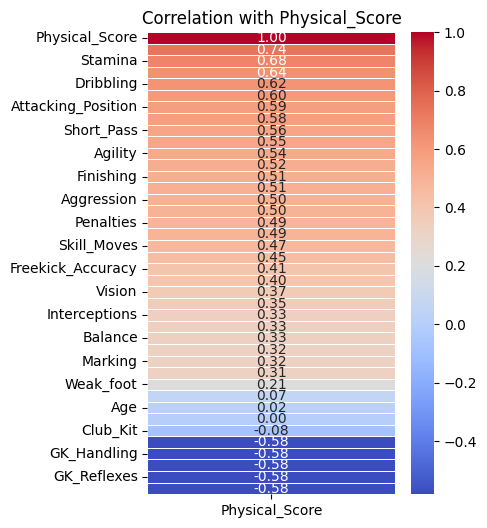

In [247]:
# Extract only the numeric columns for correlation calculation
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Extract correlation values with respect to the target variable ('loan_status')
target_variable = 'Physical_Score'
target_corr = corr_matrix[[target_variable]].sort_values(by=target_variable, ascending=False)

# Plotting the heatmap for correlation values with respect to the target variable
plt.figure(figsize=(4, 6))
sns.heatmap(target_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title(f'Correlation with {target_variable}')
plt.show()

# Correlation Matrix

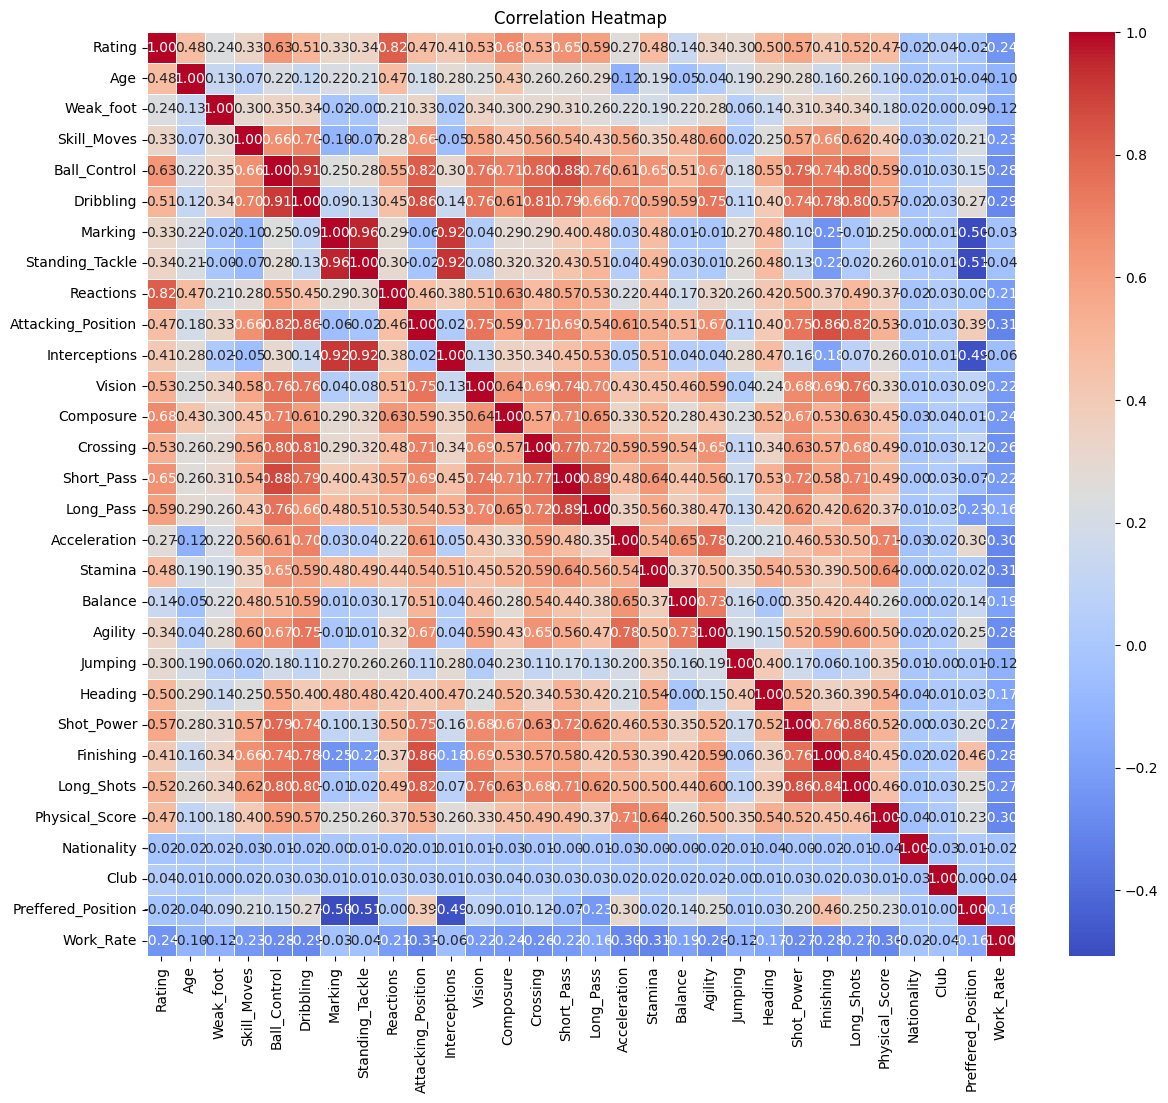

In [234]:
corr_matrix = df_sort.corr()

# Plotting the heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Relation( Reactions vs Rating)

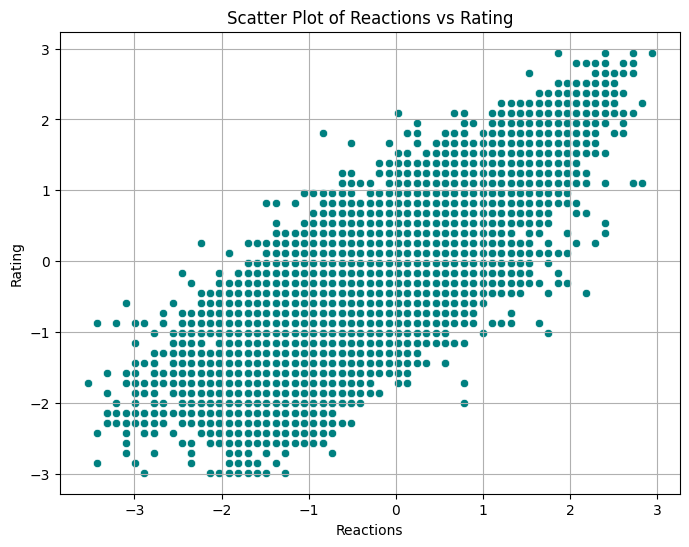

In [248]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_sort, x='Reactions', y='Rating', color='teal')
plt.title('Scatter Plot of Reactions vs Rating')
plt.xlabel('Reactions')
plt.ylabel('Rating')
plt.grid(True)
plt.show()
